In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
!pip install  ydata-profiling
from ydata_profiling import ProfileReport


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4fa850a4503bb673b675999c61b5c9e932a4a97362c8901a954185b9efdd9d83
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
df= pd.read_csv('/content/African_crises_dataset.csv')
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [ ]:
profile = ProfileReport(df, title = 'My Report')
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.isnull().sum()

,0
country_number,0
country_code,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [ ]:
def outlierss(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

In [ ]:
outlierss(df,'exch_usd')
outlierss(df,'inflation_annual_cpi')

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [ ]:
df['banking_crisis'] = df['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [ ]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [ ]:
X = df.drop(['banking_crisis', 'year', 'country', 'country_code', 'country_number'], axis=1)
y = df['banking_crisis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
log_reg_pred = log_reg.predict(x_test_scaled)

In [ ]:
accuracy_score(y_test, log_reg_pred)

0.9858490566037735

In [ ]:
accuracy_score(y_train, log_reg.predict(x_train_scaled))

0.9752066115702479

In [ ]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       0.94      0.89      0.91        18

    accuracy                           0.99       212
   macro avg       0.97      0.94      0.95       212
weighted avg       0.99      0.99      0.99       212



In [ ]:
confusion_matrix(y_test, log_reg_pred)

array([[193,   1],
       [  2,  16]])

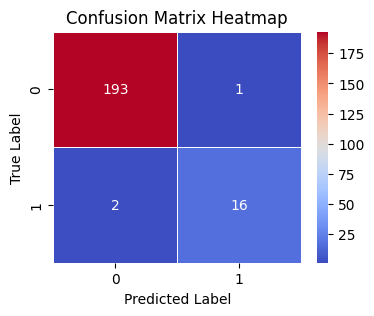

In [ ]:
cm = confusion_matrix(y_test, log_reg_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#DescisionTreeClassification

In [ ]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(x_test)
dt_pred_train = dt.predict(x_train)

In [ ]:
accuracy_score(y_test, dt_pred)

0.9575471698113207

In [ ]:
accuracy_score(y_train, dt_pred_train)

1.0

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       194
           1       0.67      1.00      0.80        18

    accuracy                           0.96       212
   macro avg       0.83      0.98      0.89       212
weighted avg       0.97      0.96      0.96       212



In [ ]:
confusion_matrix(y_test, dt_pred)

array([[185,   9],
       [  0,  18]])

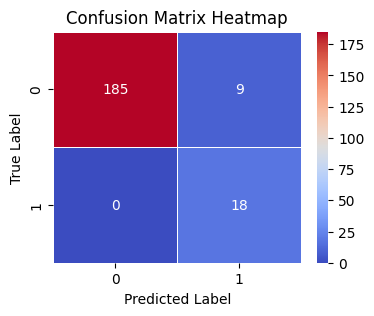

In [ ]:
cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add labels, title, and colorbar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#KNNClassification

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_test_scaled)
knn_pred_train = knn.predict(x_train_scaled)

In [ ]:
accuracy_score(y_test, knn_pred)

0.9952830188679245

In [ ]:
accuracy_score(y_train, knn_pred_train)

0.9799291617473436

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       194
           1       0.95      1.00      0.97        18

    accuracy                           1.00       212
   macro avg       0.97      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



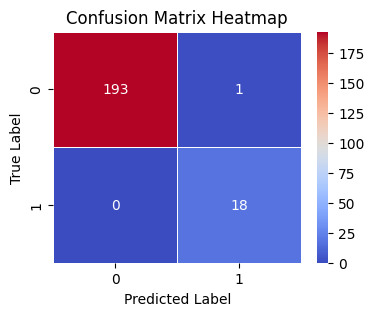

In [ ]:
cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add labels, title, and colorbar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn2_pred = knn2.predict(x_test_scaled)
knn2_pred_train = knn2.predict(x_train_scaled)

In [ ]:
accuracy_score(y_test, knn2_pred)

0.9952830188679245

In [ ]:
accuracy_score(y_train, knn2_pred_train)

0.9799291617473436

In [ ]:
print(classification_report(y_test, knn2_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       194
           1       0.95      1.00      0.97        18

    accuracy                           1.00       212
   macro avg       0.97      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



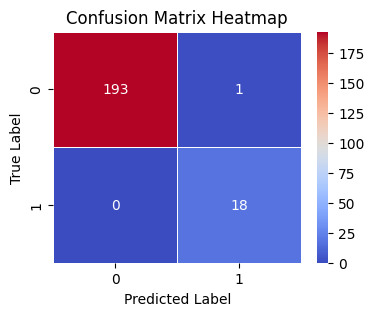

In [ ]:
cm = confusion_matrix(y_test, knn2_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add labels, title, and colorbar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()